<a href="https://colab.research.google.com/github/JSJeong-me/Detectron2/blob/main/detectron2-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=bjay7fT934Y

In [1]:
#!pip install pyyaml==5.1

In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

### Runtime restart!!! 

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


### Import Detectron2 and Run Inferencing

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

In [4]:
%cd /content/

/content


In [5]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

In [ ]:
image = cv2.imread('./input.jpg')
cv2_imshow(image)

In [ ]:
#cfg.MODEL.DEVICE = "cpu"

In [7]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

In [10]:
viz = Visualizer(image[:, :, ::-1],
            metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
            #scale=1, 
            #instance_mode= 1 # ColorMode.SEGMENTATION 
)

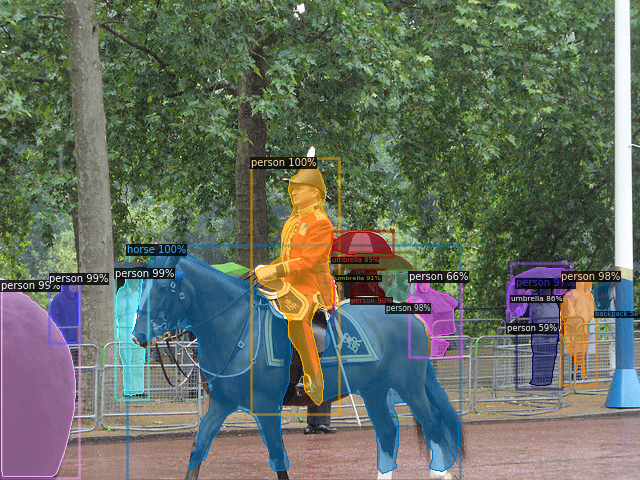

In [11]:
output = viz.draw_instance_predictions(outputs['instances'].to('cpu'))
cv2_imshow(output.get_image()[:, :, ::-1])